<a href="https://colab.research.google.com/github/Yusra-Zafar/Deep-Learning/blob/main/MLP-classification/customer_churn_prediction_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction using MLP (binary classification problem)

## EDA & Preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [4]:
# load dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# remove unnecessary features
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.duplicated().sum()

0

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
# customer churn percentage
(df['Exited'].value_counts()/len(df)*100)

Exited
0    79.63
1    20.37
Name: count, dtype: float64

In [16]:
# one-hot encoding categorical features
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [17]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [18]:
# standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

## Getting model ready

In [20]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [21]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [22]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()

### setting up MLP

In [25]:
# first layer directly taking input features
model.add(Dense(11, activation = 'relu', input_dim = 11))

# hidden layer
model.add(Dense(7, activation='relu'))

# output layer for binary classification
model.add(Dense(1, activation = 'sigmoid'))

In [26]:
# compiling model
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics='accuracy')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 7)                 84        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 224 (896.00 Byte)
Trainable params: 224 (896.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training

In [28]:
# training/fitting
history = model.fit(x = X_train, y=y_train, epochs = 20, validation_split=0.2)

Epoch 1/20
200/200 [==============================] - 1s 3ms/step - loss: 0.5493 - accuracy: 0.7428 - val_loss: 0.4829 - val_accuracy: 0.7969
Epoch 2/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.7986 - val_loss: 0.4557 - val_accuracy: 0.8006
Epoch 3/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8053 - val_loss: 0.4428 - val_accuracy: 0.8062
Epoch 4/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8167 - val_loss: 0.4319 - val_accuracy: 0.8094
Epoch 5/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8202 - val_loss: 0.4202 - val_accuracy: 0.8163
Epoch 6/20
200/200 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8295 - val_loss: 0.4044 - val_accuracy: 0.8269
Epoch 7/20
200/200 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8375 - val_loss: 0.3898 - val_accuracy: 0.8406
Epoch 

### Testing

In [29]:
# model testing
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [30]:
y_pred

array([[0.03054841],
       [0.11766149],
       [0.07035902],
       ...,
       [0.01430145],
       [0.04764568],
       [0.38111192]], dtype=float32)

In [31]:
# use threshold of 0.5 for binary classification
y_pred = np.where(y_pred > 0.5, 1, 0)

### Evaluating

In [32]:
# model evaluation (training accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())

0.8545

In [33]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Visualizing model's performance

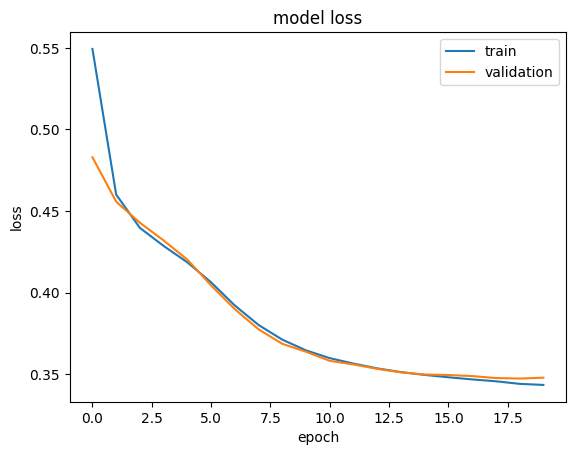

In [34]:
# plot line graphs of train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

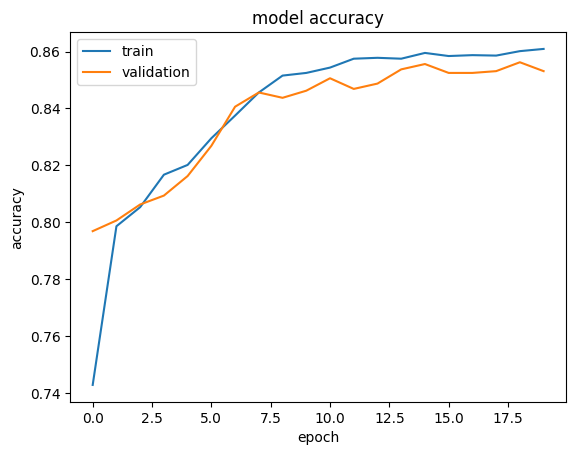

In [35]:
# plot line graphs of train and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()